<a href="https://colab.research.google.com/github/AleemRahil/Robust-End-to-End-E-Commerce-Analytics-Automation-with-LLMs/blob/main/ecommerce_shopify_product_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tagging Shopify Products with GPT-4 Vision
Tagging your products systematically is essential in the ecommerce space, as it directly impacts how easily customers can discover and interact with your offerings.


Tagging Shopify Products with GPT-4 Vision
In the competitive world of ecommerce, personalization, and analytics are essential for improving the customer experience and understanding consumer behavior. Effective product tagging plays a vital role in creating a personalized shopping experience.

In this project, we'll examine using GPT-4 Vision to automate the tagging of Shopify products, ensuring accuracy and promoting consistency across your product catalog.

Here's what we're going to cover:

Why you need to tag your Ecommerce products

Extracting product details: Learn to gather all the necessary product information from Shopify's API. This includes everything from product type and color to style.

Feeding images to GPT-4 Vision: Let GPT-4 Vision analyze the product images and generate tags that match each product.

Updating Shopify listings: After generating tags with LLMs, you must add them back to the Shopify product listings.

#Why You Need to Tag Your Products
Tagging your products systematically is essential in ecommerce, as it directly impacts how easily customers can discover and interact with your offerings.

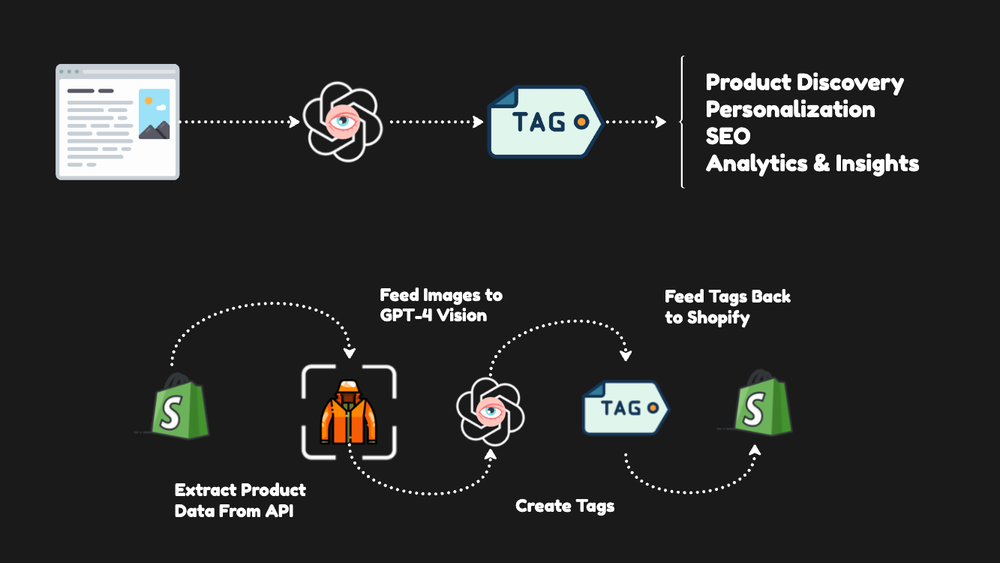

Well-defined tags contribute to a more personalized shopping experience by allowing algorithms to recommend products that align with a customer's search history and preferences. This personal touch can significantly boost customer satisfaction and loyalty.

Tag analysis extends to image performance. By correlating image attributes with customer engagement, ecommerce businesses can determine which visuals—such as lifestyle shots or minimalist designs—drive conversions. This insight is pivotal for CRO, dictating the most compelling way to showcase products.

In paid media campaigns, tags inform ad content, ensuring features that resonate with customers are front and center. Highlighting popular tags can enhance ad relevance, potentially boosting click-through rates and lowering acquisition costs. Tags also fuel A/B testing, allowing businesses to compare different product presentations and ad creatives, optimizing both inventory and advertising.

#Installing Necessary Libraries
Before diving into the code, we must ensure all the necessary Python libraries are installed. These libraries include python-dotenv for managing environment variables, openai for interacting with the GPT-4 API, and ShopifyAPI for accessing Shopify's platform. Run the following command to install them:

#Loading Environment Variables
Next, we load the environment variables that will be used to authenticate our requests to both Shopify and OpenAI. The .env file should contain your Shopify merchant information and OpenAI API key. The python-dotenv package makes it easy to load these into our environment:

In [ ]:
!pip install -qU \
  python-dotenv \
  openai \
  ShopifyAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


#Setting Up Shopify API Session
With the environment variables loaded, we can now establish a session with Shopify. This requires the merchant URL, API version, and access token. Once the session is activated, we're authenticated to make API calls to Shopify:

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

True

#Extracting Product Images from Shopify
To tag products, we first need to retrieve them from Shopify. We'll write a Python function that uses Shopify's API to fetch product data.

This function will handle pagination to ensure we gather all products, regardless of how many there are:

In [ ]:
import shopify

merchant= os.getenv('SHOPIFY_MERCHANT')
token = os.getenv('SHOPIFY_TOKEN')
api_session = shopify.Session(merchant, '2023-01', token)
shopify.ShopifyResource.activate_session(api_session)

In [ ]:
from openai import OpenAI
client = OpenAI()

In [ ]:
def get_data(object_name):
    all_data=[]
    attribute=getattr(shopify,object_name)
    data=attribute.find(since_id=0, limit=250)
    for d in data:
        all_data.append(d)
    while data.has_next_page():
        data=data.next_page()
        for d in data:
            all_data.append(d)
    return all_data

With our get_data function, extracting products and their details is straightforward. We can access attributes such as tags and images, which are essential for our tagging process:

In [ ]:
products=get_data('Product')

In [ ]:
product_id=products[0].attributes['admin_graphql_api_id']

In [ ]:
product_id

'gid://shopify/Product/6757238767784'

In [ ]:
products[0].attributes['tags']

'egnition-sample-data, men, sale, summer, vans'

In [ ]:
image_url=products[0].images[0].attributes['src']

#Preparing Product Images for Processing

Preparing Product Images for Processing
Before we can tag the images using GPT-4 Vision, we need to process them. This involves converting the images into a format that can be sent to the OpenAI API. Here, we'll download the image, display it, and encode it in base64:

In [ ]:
import requests
from PIL import Image
from io import BytesIO

import numpy as np
from IPython.display import display

import cv2
import base64

In [ ]:
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

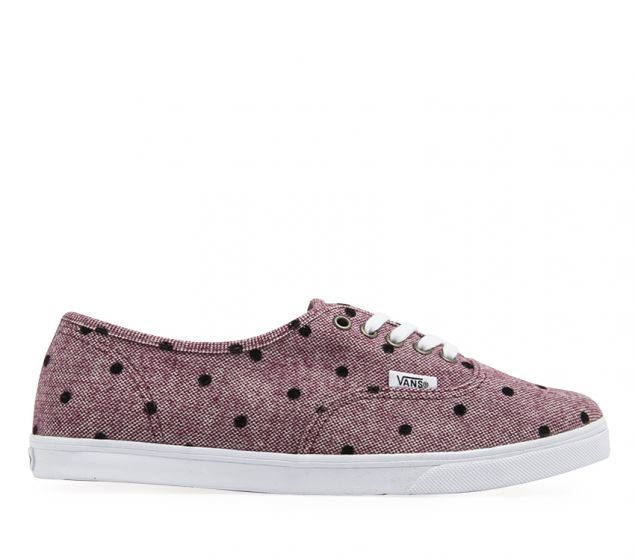

In [ ]:
img

#Encoding Images for GPT-4 Vision
Now, let's process the first image, convert it to a NumPy array, ensure it's in the correct color format, encode it as a JPEG, and then convert this JPEG to a base64 string. GPT -4 Vision will use this base64 string for tagging:

In [ ]:
# Initialize an empty list to hold the base64 encoded images
base64Frames = []

images=[img]

# Loop through each image in the images array
for img in images[0:1]:
    # Convert PIL JpegImageFile to a NumPy array
    image_array = np.array(img)

    # Ensure the image is in the correct color format
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

    # Encode the image as a JPEG
    _, buffer = cv2.imencode('.jpg', image_array)

    # Convert the buffer to a base64 string
    base64_image = base64.b64encode(buffer).decode('utf-8')

    # Append the base64 encoded image to the list
    base64Frames.append(base64_image)

Here, we're preparing an image for analysis by GPT-4 Vision. Here's a breakdown of each step:

We start with a list named images that contains our product images with img representing an individual image loaded in a previous step.

We loop through the first image in the images list—this is indicated by [0:1], which slices the list only to include the first item.

Within the loop, we convert the image, which is in a Python Imaging Library (PIL) format, into a NumPy array. This is a standard procedure for image processing as NumPy arrays are a more versatile format for manipulating image data.

Next, we use the cv2.cvtColor function from the OpenCV library to change the color format of the image from RGB (Red, Green, Blue) to BGR (Blue, Green, Red). OpenCV uses BGR as its default color format, while PIL uses RGB. This step ensures compatibility with OpenCV's functions, which we'll use later.
We then encode the NumPy array representing our image in a JPEG format. This is done using OpenCV's imencode function, which returns two items: a success flag and the actual buffer containing the encoded image. We're only interested in the buffer, hence the underscore (_) is used to ignore the first value (the success flag).

The buffer is then encoded to a base64 string using the base64.b64encode function. Base64 is a common method for encoding binary data as ASCII text, necessary because GPT-4 Vision expects image data in this text format.
Finally, we append the base64-encoded image to the list base64Frames. This list will be used when we construct our prompt to GPT-4 Vision, ensuring that the images are in the correct format for the model to analyze.

#Tagging Products with GPT-4 Vision
We are now set to utilize GPT-4 Vision for generating tags. We prepare a prompt explaining what we need and send the base64 encoded images to the API. GPT-4 will return a list of tags for each product image:

In [ ]:
prompt="""Here is a list of images with products from an ecommerce store.
          Give a list of tags for each product image that can be used for marketing. Return a comma separated list of strings.
          If you can't see it don't make stuff up"""

PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [prompt,
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0:5]),
        ],
    },
]

params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 300,
}

In [ ]:
completion = client.chat.completions.create(**params)
tags=completion.choices[0].message.content

In [ ]:
tags

'casual shoes, sneakers, polka dot pattern, Vans, low-top trainers, lace-up, streetwear, comfortable, unisex, fashion, skater shoes, canvas shoes'

The PROMPT_MESSAGES array is constructed to communicate our requirements to GPT-4 Vision. It contains the prompt, which directs the model to provide a list of tags and specifies that these tags should be returned as a comma-separated list. This format aligns with Shopify's requirement for tag input, as shown in the Shopify API documentation. The map function included in the prompt dynamically adjusts the images, resizing them for optimal processing by GPT-4 Vision.

Upon executing the prompt with the specified parameters, GPT-4 Vision returns a string of tags for each image. These tags are then printed out, ready to be fed into the Shopify mutation tagsAdd. The mutation in Shopify's API expects tags in a comma-separated format, matching the output we've generated from GPT-4 Vision. This ensures that the tags are accepted by Shopify's system without the need for additional formatting, streamlining the process of enhancing product listings with relevant and searchable tags.

#Updating Shopify Products with New Tags
Once we have our tags from GPT-4 Vision, the final step is to apply these to our products in Shopify. Shopify utilizes GraphQL mutations for tagging, allowing precise updates to attributes.

The tagsAdd mutation adds tags to various Shopify objects, like products or customers. It requires the object's ID and a list of tags, which can be individual strings or a comma-separated list. This flexible approach facilitates batch updates, which is particularly efficient for managing product tags en masse, ensuring consistency and saving time.

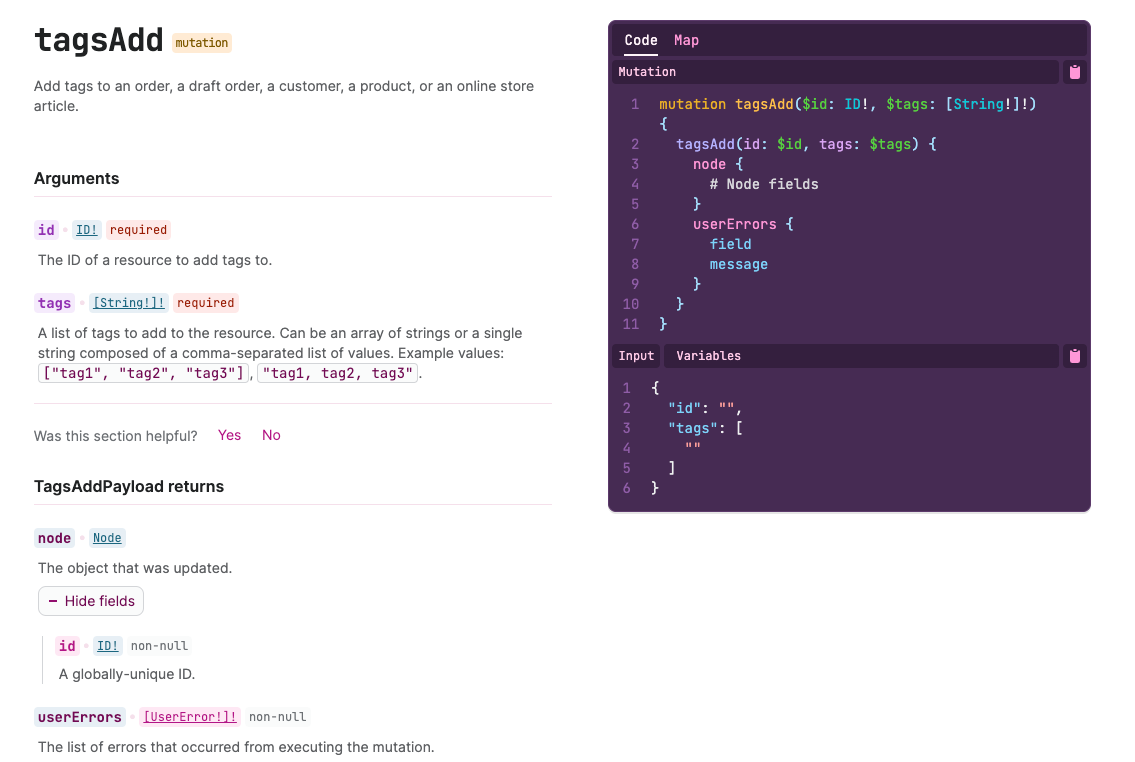

We'll use the Shopify GraphQL API for this task, creating a function to send a mutation that adds tags to a specified product:

In [ ]:
import shopify

def shopify_client(merchant, token):
    """
    Initialize a Shopify GraphQL client.
    """
    api_session = shopify.Session(merchant, '2023-01', token)
    shopify.ShopifyResource.activate_session(api_session)
    client = shopify.GraphQL()
    return client

def add_tags_to_product(merchant, token, product_id, tags):

    client = shopify_client(merchant, token)

    # GraphQL mutation for adding tags
    mutation = """
    mutation tagsAdd($id: ID!, $tags: [String!]!) {
      tagsAdd(id: $id, tags: $tags) {
        node {
          id
        }
        userErrors {
          field
          message
        }
      }
    }
    """

    # Prepare the payload
    variables = {
        "id": product_id,
        "tags": tags,
    }

    # Execute the mutation
    result = client.execute(mutation, variables)

    # Print the result or handle it as needed
    print(result)

This mutation needs a little explanation to understand how it fits into our process of tagging Shopify products with GPT-4 Vision-generated tags. The add_tags_to_product function is crucial for integrating these new tags into our Shopify product listings. Here’s how it operates:

First, the function takes several parameters: the merchant's information, an authentication token, the product ID of the item we're updating, and the tags generated by GPT-4 Vision that we want to add.

We connect to Shopify using a helper function, shopify_client authenticated with the merchant's details and token. Within the add_tags_to_product function, we define a GraphQL mutation named tagsAdd. This mutation is designed to instruct Shopify's API to associate new tags with a product identified by its unique ID ($id).

The new tags to be added are specified in the mutation as a list of strings ($tags).

The next step involves setting up the variables dictionary, which contains the actual product ID and the new tags (the tags are split into a list from the provided string of tags). This setup is crucial for ensuring the tags are correctly formatted for the GraphQL mutation.

With the mutation and variables prepared, we execute the operation against Shopify's API using the client.execute method, passing in the mutation and variables. This action updates the product's tags with the ones we generated using GPT-4 Vision.

#Tagging the Product
Finally, we can tag the product using the function we've defined. This process automates the tagging of products with relevant, AI-generated tags, enhancing the product metadata for better searchability and personalization:

In [ ]:
print(product_id)

gid://shopify/Product/6757238767784


In [ ]:
print(tags)

casual shoes, sneakers, polka dot pattern, Vans, low-top trainers, lace-up, streetwear, comfortable, unisex, fashion, skater shoes, canvas shoes


In [ ]:
add_tags_to_product(merchant, token, product_id, tags)

This is how you automate the tagging of Shopify products, from setting up your environment and fetching product data to processing images and applying LLM-generated tags. This approach not only saves time but also enhances the metadata quality of your ecommerce products, facilitating better personalization and analytics capabilities.